<a href="https://colab.research.google.com/github/CU-Rocketry/ModSim/blob/main/Flight_Sim_2023-2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Simulation of Clarkson Rocketry's CURRERA.
Created by Elena Goldman,
4.14.2024.
Basic RocketPy Appplication. Code taken and adapted from RocketPy's
documentation, using CAD and OpenRocket. This smulation does not yet include parachutes.

Clarkson University's Currera is flying in Spaceport America Cup's 2024 10k feet AGL altitude challenge. Airbrakes system will be used to lower Currera to its target altitude, however are not included in this sumation.

In [ ]:
!pip install netCDF4
!pip install rocketpy
import numpy as np
import matplotlib.pyplot as plt
import rocketpy as rp
from rocketpy import Environment, Rocket, SolidMotor, Flight
import datetime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 8.4 MB/s eta 0:00:00
  Created wheel for simplekml: filename=simplekml-1.3.6-py3-none-any.whl size=65859 sha256=eae8de35d65bc730ac966258a376ccdd1850bb33bd30a04207f205c8249db03d
  Stored in directory: /root/.cache/pip/wheels/16/7c/e6/621a95f24bd1ff987368f1c37881ffe013433ff6b413d87fcb
Successfully built simplekml


In [ ]:
#Will need to connect to your own drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
env = Environment(
    latitude=32.990254,
    longitude=-106.974998,
    elevation=1400,
)

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
  (tomorrow.year, tomorrow.month, tomorrow.day, 12), timezone="America/Denver"
) # Tomorrow's date in year, month, day, hour UTC format

env.set_atmospheric_model(type='wyoming_sounding', file='http://weather.uwyo.edu/cgi-bin/sounding?region=naconf&TYPE=TEXT%3ALIST&YEAR=2024&MONTH=06&FROM=1612&TO=1612&STNM=72365')


Gravity Details

Acceleration of gravity at surface level:    9.7907 m/s²
Acceleration of gravity at  33.069 km (ASL): 9.6944 m/s²


Launch Site Details

Launch Date: 2024-09-20 18:00:00 UTC | 2024-09-20 12:00:00 America/Denver
Launch Site Latitude: 32.99025°
Launch Site Longitude: -106.97500°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315468.64 W    3651938.65 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1619.0 m


Atmospheric Model Details

Atmospheric Model Type: wyoming_sounding
wyoming_sounding Maximum Height: 33.069 km

Surface Atmospheric Conditions

Surface Wind Speed: 1.54 m/s
Surface Wind Direction: 280.00°
Surface Wind Heading: 100.00°
Surface Pressure: 834.00 hPa
Surface Temperature: 292.95 K
Surface Air Density: 0.992 kg/m³
Surface Speed of Sound: 343.12 m/s


Earth Model Details

Earth Radius at Launch site: 6371.83 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034



Gravity Model Plots


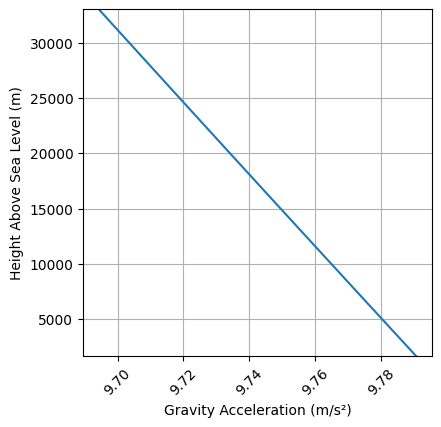



Atmospheric Model Plots


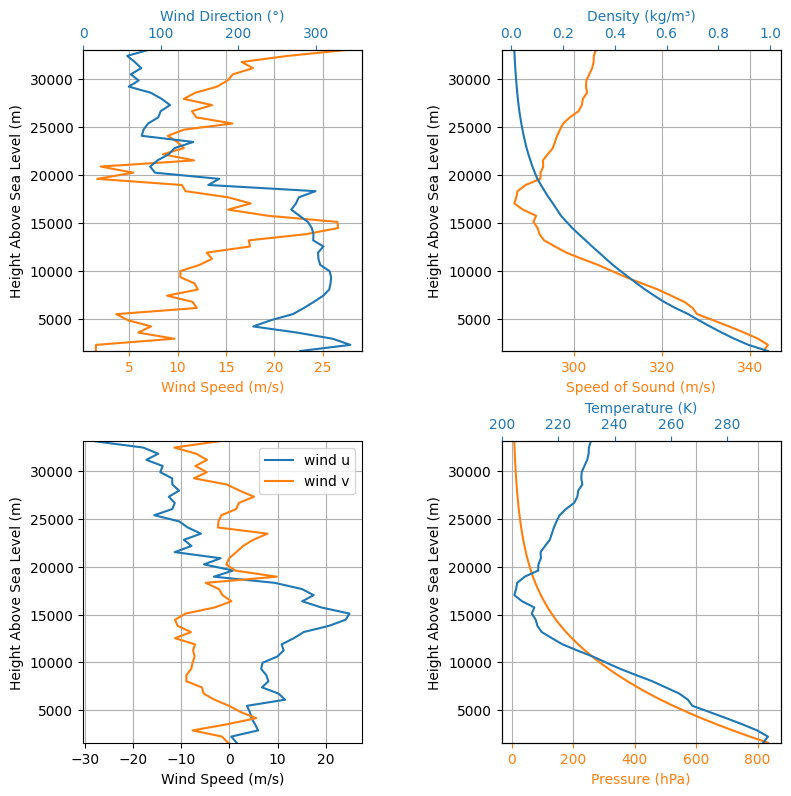

In [ ]:
env.all_info()

In [ ]:
AeroTechM2500 = SolidMotor(
    thrust_source="/content/drive/MyDrive/motor.eng",    #AeroTech M2500 Thrust curve
    dry_mass=3.353,
    dry_inertia=(0.1633, 0.1633, 0.0041),
    center_of_dry_mass_position=0.317,
    grains_center_of_mass_position=0.3175,
    burn_time=3.9,
    grain_number=4,
    grain_separation=0.005,
    grain_density=1815,
    grain_outer_radius= 0.0875/2,
    grain_initial_inner_radius=0.0285/2,
    grain_initial_height=0.1524,
    nozzle_radius=0.085/2,
    throat_radius=0.0354/2,
    interpolation_method="linear",
    nozzle_position= -.115, #-0.05,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

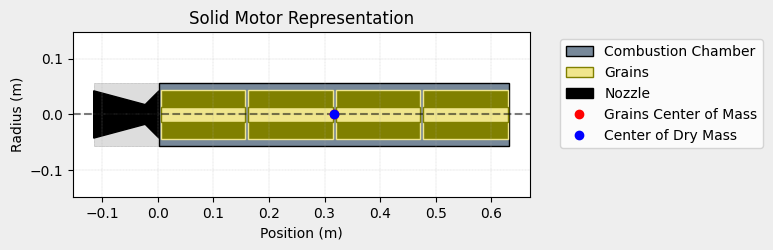

In [ ]:
AeroTechM2500.plots.draw()

Nozzle Details
Nozzle Radius: 0.0425 m
Nozzle Throat Radius: 0.0177 m

Grain Details
Number of Grains: 4
Grain Spacing: 0.005 m
Grain Density: 1815 kg/m3
Grain Outer Radius: 0.04375 m
Grain Inner Radius: 0.01425 m
Grain Height: 0.1524 m
Grain Volume: 0.001 m3
Grain Mass: 1.487 kg

Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 5.947 kg
Average Propellant Exhaust Velocity: 1607.023 m/s
Average Thrust: 2450.637 N
Maximum Thrust: 2861.69 N at 1.252 s after ignition.
Total Impulse: 9557.484 Ns



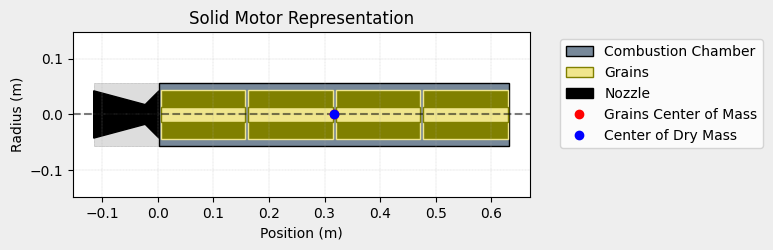

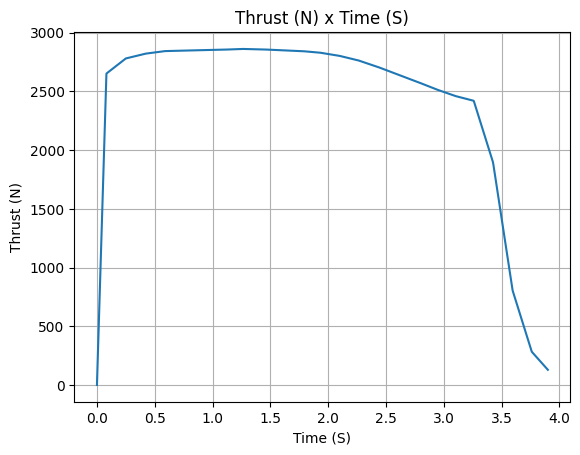

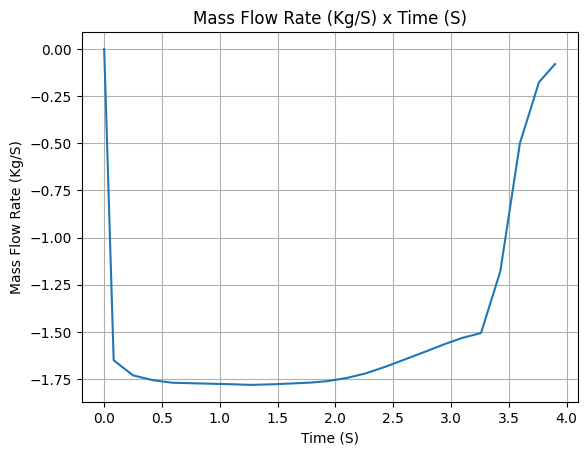

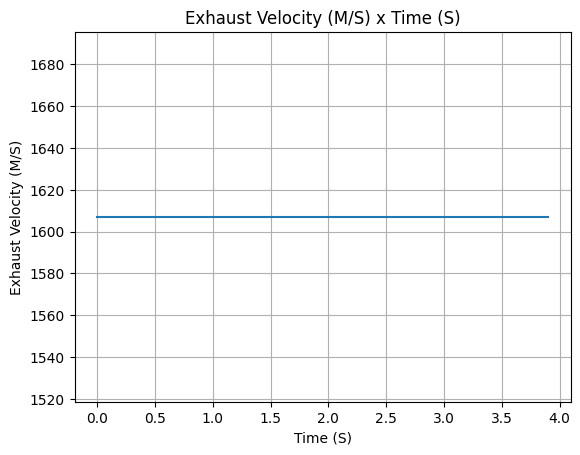

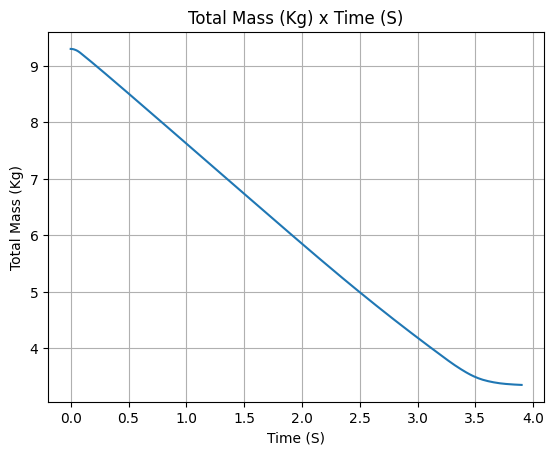

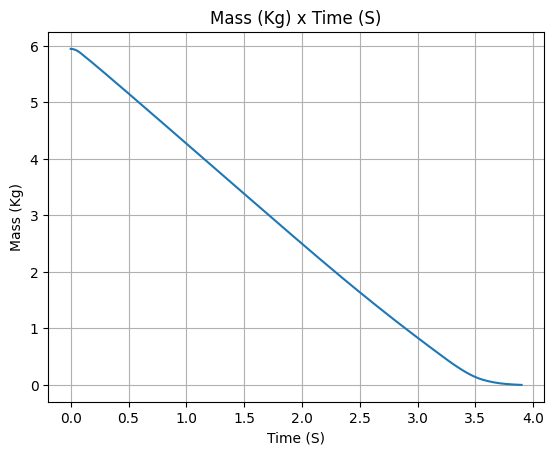

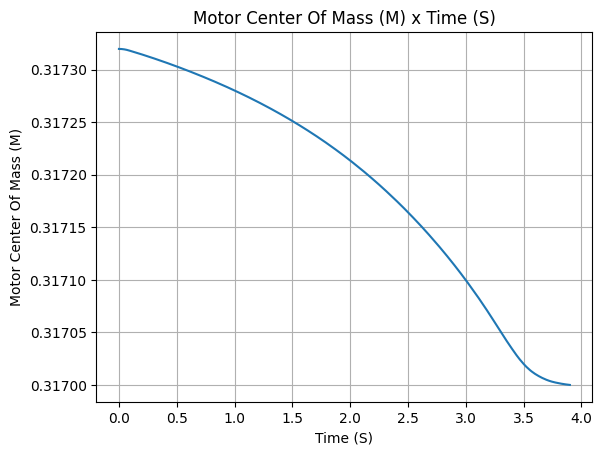

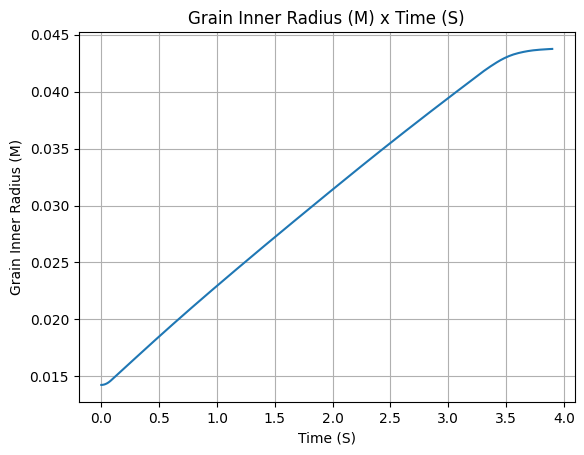

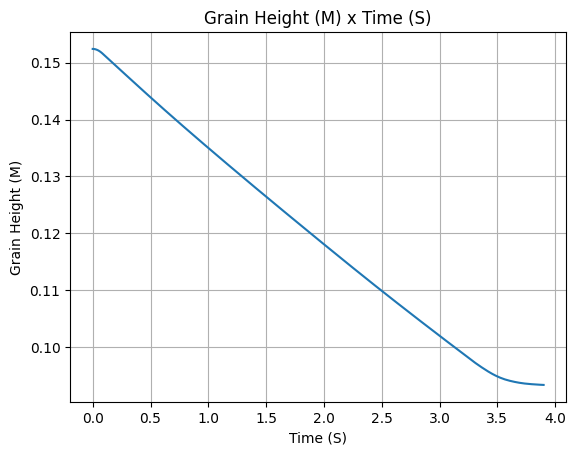

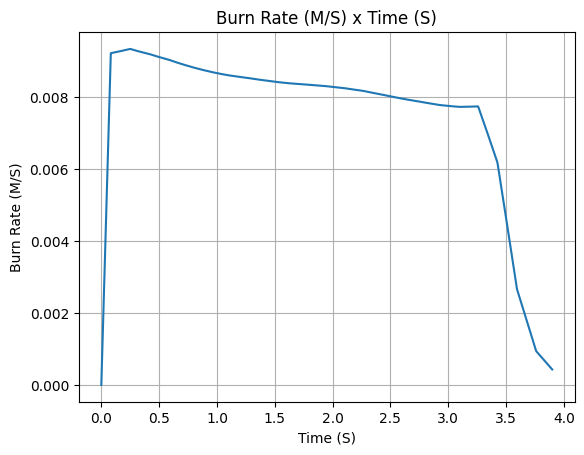

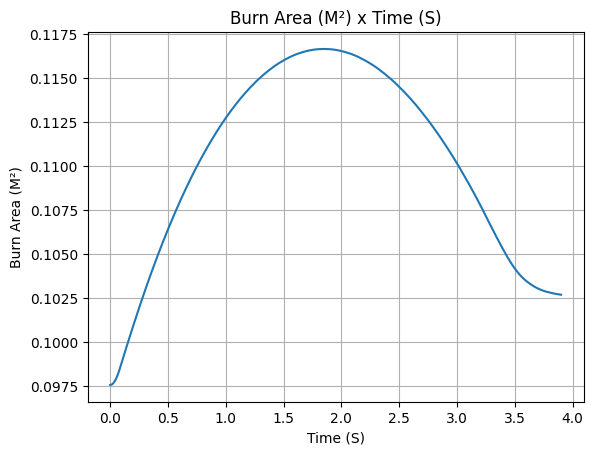

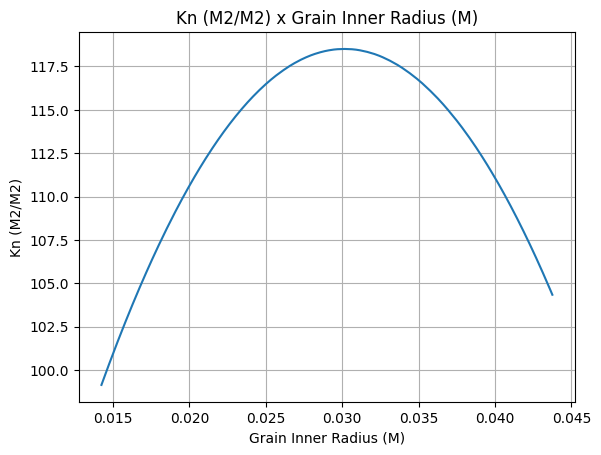

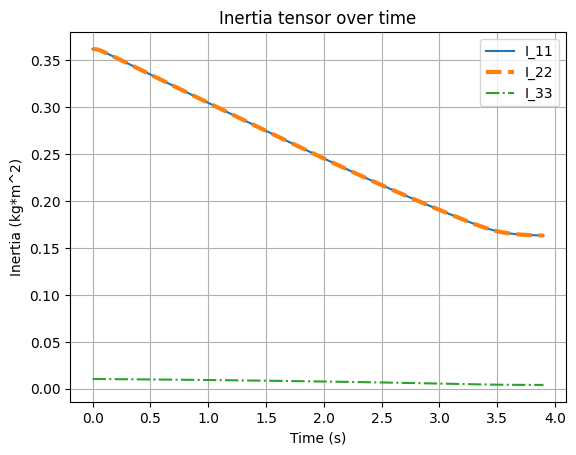

In [ ]:
AeroTechM2500.all_info()

In [ ]:
currera = Rocket(
    radius=0.0655, # m
    mass= 22.3, #22.9,  # without motor, kg
    inertia=(12.362, 12.362, 0.06), #assume long, long, rot- kg*m^2
    power_off_drag=0.5,
    power_on_drag=0.5,
    center_of_mass_without_motor=1.34, # m (center of gravity in or)
    coordinate_system_orientation="nose_to_tail",
)

buttons = currera.set_rail_buttons(
   upper_button_position= 2, #position is relative to the nose!
   lower_button_position= 2.52,
   angular_position=45
)

currera.add_motor(AeroTechM2500, position= 2.61)

nose = currera.add_nose(
    length=0.654, kind="vonKarman", position= 0 #m
)

fins = currera.add_trapezoidal_fins(
    n=4,
    root_chord=0.279,
    tip_chord=0.076,
    span= 0.105,
    sweep_length= 0.203,
    cant_angle=0,
    position= 2.26
)

tail = currera.add_tail(
    top_radius=0.131/2, bottom_radius=0.108/2, length=0.076, position=2.54,
)

In [ ]:
currera.info()


Inertia Details

Rocket Mass: 22.300 kg (without motor)
Rocket Dry Mass: 25.653 kg (with unloaded motor)
Rocket Loaded Mass: 31.600 kg
Rocket Inertia (with unloaded motor) 11: 15.172 kg*m2
Rocket Inertia (with unloaded motor) 22: 15.172 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.064 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.0655 m
Rocket Frontal Area: 0.013478 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.125 m
Rocket Center of Dry Mass - Nozzle Exit: 1.260 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.828 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.156 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 6.200/rad
Tail Lift Coefficient Derivative: -0.641/rad

Center of Pr

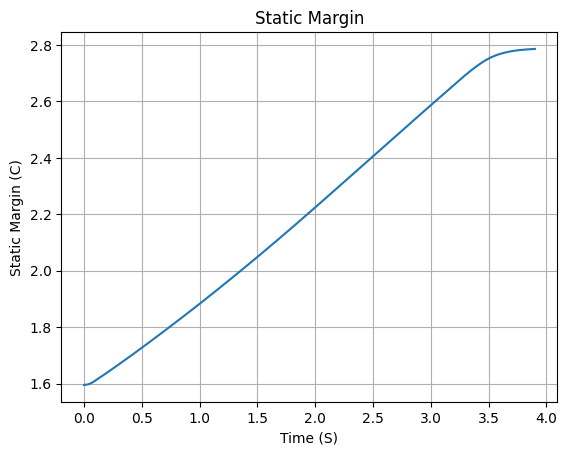

In [ ]:
currera.plots.static_margin()

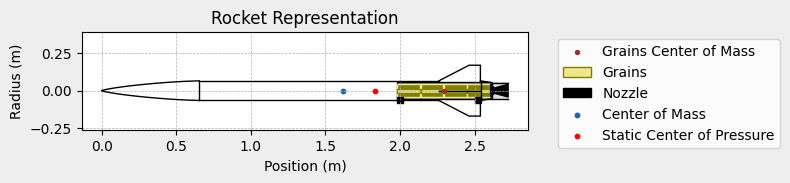

In [ ]:
currera.draw()

In [ ]:
test_flight = Flight(
  rocket=currera, environment=env, rail_length=5.2, inclination=85, heading=0
)

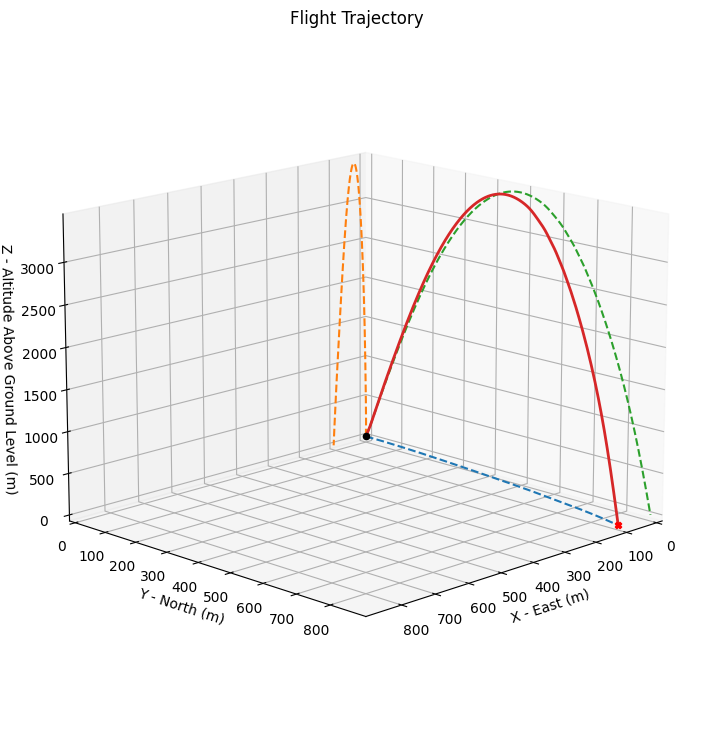

In [ ]:
test_flight.plots.trajectory_3d()

In [ ]:
test_flight.all_info()


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 1619.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 0.923 | e1: -0.040 | e2: -0.017 | e3: -0.382


/usr/local/lib/python3.10/dist-packages/rocketpy/tools.py:1087: RuntimeWarning: invalid value encountered in arcsin
  return (180 / np.pi) * 2 * np.arcsin(-((e1**2 + e2**2) ** 0.5))


ValueError: array must not contain infs or NaNs

In [ ]:
test_flight.export_kml(file_name="test_flight.kml")

#Importing Google Sheets (Ignore, But Save)


Could be useful in the future

In [ ]:
import pandas as pd

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds,_  = default()

gc = gspread.authorize(creds)

#name of google sheets
worksheet = gc.open('Experiment-9').sheet1

D4 = worksheet.acell('D4').value
print(D4)

Row1 = worksheet.row_values(1)
print(Row1)

Column1 = worksheet.col_values(1)
print(Column1)

Column1Data = worksheet.get('A2:A7')
print(Column1Data)

worksheet = pd.DataFrame({worksheet}) #what
print (worksheet)